
AUTOR: Robert Benassai Dalmau

Aquest programa simula la teoria de variables ocultes amb un fotó d'angle aleatori i uns polaritzadors amb angles alpha i beta. També calcula la S de la desigualtat de Bell.

In [1]:
def rho(photon,alpha,beta):
    #fem passar el fotó pels polaritzadors
    detector1=0
    detector2=0
    photon = photon%(math.pi)
    alpha = alpha%(math.pi)
    beta = beta%(math.pi)
    if abs(alpha-photon)<=(math.pi/4) or abs(alpha-photon)>(3*math.pi/4):#si passa pel primer pol
        detector1=1
    if abs(beta-photon)<=(math.pi/4) or abs(beta-photon)>(3*math.pi/4):#si passa pel segon
        detector2=1
    detectors=[detector1,detector2]
    return(detectors)
def rho2(photon,alpha,beta):
    detector1=0
    detector2=0
    photon = photon%(math.pi)
    alpha = alpha%(math.pi)
    beta = beta%(math.pi)
    if random.uniform(0, 1) < math.cos(alpha-photon)**2:
        detector1 = 1
    if random.uniform(0, 1) < math.cos(beta-photon)**2:
        detector2 = 1
    detectors=[detector1,detector2]
    return(detectors)

In [2]:
import random
def hvt_detection(alph, bet, photons):
    #nombre total de fotons tirats, vertical-vertical, VH...
    VV=0
    HH=0
    HV=0
    VH=0
    for i in range(1,photons):
    #fotó de polarització aleatòria entre [-pi,pi]
        photon=random.uniform(-math.pi,math.pi)#ha de ser entre -pi i pi perquè si no el alpha=-45 no pilla cap al detector1
        
    #fem passar el fotó pels polaritzadors
        detectors=rho(photon,alph,bet)#funció de distribució de probabilitat
        detector1=detectors[0]
        detector2=detectors[1]
    #organitzem els resultats per VV, VH, HV, HH
        if detector1==1 and detector2==1:
            VV=VV+1
        elif detector1==1 and detector2==0:
            VH=VH+1
        elif detector1==0 and detector2==1:
            HV=HV+1
        elif detector1==0 and detector2==0:
            HH=HH+1
        else:
            print('error',detector1,detector2)

# [angle del pol1, angle pol2, deteccions detector 1, deteccions detector 2, Entrellaçats (detectats VV)]
    resultats=[alph,bet,VH+VV,HV+VV,VV]
    return resultats

In [13]:
import random
import time
import math
import concurrent.futures
import  itertools
def hvt_mod(photons,alpha, beta, thetal,phi):
    #creem les llistes dels angles que posarem als polaritzadors per poder calcular S
    #fem que els angles estiguin entre -pi i pi
    pol1=[]
    pol2=[]
    for i in range(0,4):
        if (alpha+i*math.pi/4)>math.pi:
            pol1.append(alpha+i*math.pi/4-2*math.pi)
        else:
            pol1.append(alpha+i*math.pi/4)
    for i in range(0,4):
        if beta+i*math.pi/4>math.pi:
            pol2.append(beta+i*math.pi/4-2*math.pi)
        else:
            pol2.append(beta+i*math.pi/4)  
    table1=[]
    for alph in pol1:
        with concurrent.futures.ProcessPoolExecutor(max_workers = 4) as executor:
            result = list(executor.map(hvt_detection, itertools.repeat(alph, len(pol2)), pol2, itertools.repeat(photons, len(pol2))))
        for res in result:
            table1.append(res)
    return table1


In [17]:
import random
import time
import math
import concurrent.futures
def hvt(photons,alpha, beta, thetal,phi):
    #creem les llistes dels angles que posarem als polaritzadors per poder calcular S
    #fem que els angles estiguin entre -pi i pi
    pol1=[]
    pol2=[]
    for i in range(0,4):
        if (alpha+i*math.pi/4)>math.pi:
            pol1.append(alpha+i*math.pi/4-2*math.pi)
        else:
            pol1.append(alpha+i*math.pi/4)
    for i in range(0,4):
        if beta+i*math.pi/4>math.pi:
            pol2.append(beta+i*math.pi/4-2*math.pi)
        else:
            pol2.append(beta+i*math.pi/4)  
    table1=[]
    for alph in pol1:
        for bet in pol2:
    #nombre total de fotons tirats, vertical-vertical, VH...
            VV=0
            HH=0
            HV=0
            VH=0
            for i in range(1,photons):
            #fotó de polarització aleatòria entre [-pi,pi]
                photon=random.uniform(-math.pi,math.pi)#ha de ser entre -pi i pi perquè si no el alpha=-45 no pilla cap al detector1

            #fem passar el fotó pels polaritzadors
                detectors=rho(photon,alph,bet)#funció de distribució de probabilitat
                detector1=detectors[0]
                detector2=detectors[1]
            #organitzem els resultats per VV, VH, HV, HH
                if detector1==1 and detector2==1:
                    VV=VV+1
                elif detector1==1 and detector2==0:
                    VH=VH+1
                elif detector1==0 and detector2==1:
                    HV=HV+1
                elif detector1==0 and detector2==0:
                    HH=HH+1
                else:
                    print('error',detector1,detector2)

    # [angle del pol1, angle pol2, deteccions detector 1, deteccions detector 2, Entrellaçats (detectats VV)]
            resultats=[alph,bet,VH+VV,HV+VV,VV]
            table1.append(resultats)
            resultats=[]
    return table1
            

In [18]:
start = time.perf_counter()
table1=hvt_mod(10000,-math.pi/4,-math.pi/8,math.pi/4,26*math.pi/180)
for i in table1:
    print(i)
finish = time.perf_counter()
print(f'finished in {round(finish-start,2)} s')

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [19]:
start = time.perf_counter()
table1=hvt(10000,-math.pi/4,-math.pi/8,math.pi/4,26*math.pi/180)
for i in table1:
    print(i)
finish = time.perf_counter()
print(f'finished in {round(finish-start,2)} s')

[-0.7853981633974483, -0.39269908169872414, 4958, 5017, 3737]
[-0.7853981633974483, 0.39269908169872414, 4964, 5009, 1242]
[-0.7853981633974483, 1.1780972450961724, 5087, 5018, 1340]
[-0.7853981633974483, 1.9634954084936207, 5040, 5017, 3799]
[0.0, -0.39269908169872414, 4998, 4946, 3706]
[0.0, 0.39269908169872414, 4988, 4987, 3762]
[0.0, 1.1780972450961724, 5018, 5022, 1242]
[0.0, 1.9634954084936207, 5007, 4970, 1234]
[0.7853981633974483, -0.39269908169872414, 5002, 5024, 1286]
[0.7853981633974483, 0.39269908169872414, 4877, 4899, 3648]
[0.7853981633974483, 1.1780972450961724, 5000, 5042, 3763]
[0.7853981633974483, 1.9634954084936207, 5029, 5075, 1287]
[1.5707963267948966, -0.39269908169872414, 5054, 4962, 1230]
[1.5707963267948966, 0.39269908169872414, 5097, 4985, 1302]
[1.5707963267948966, 1.1780972450961724, 4987, 4952, 3740]
[1.5707963267948966, 1.9634954084936207, 5041, 5049, 3796]
finished in 0.28 s


Amb aquestes dades calculem la S desigualtat de Bell:

In [20]:
def S_calc_cla(table1):
    Elist=[]
    #Nc=llista de coincidències, agafa la última columna de la taula
    Nc=[]
    for result in table1:
        Nc.append(result[4])
    #posicions en la llista de coincidències de E(alpha,beta). Ho faig així perquè segueixen un patró.
    posab=[0,1,4,5]
    for i in posab:
        #calcula la E segons la posició de E(alpha,beta) de la llista de coincidències
        E=(Nc[i]+Nc[i+10]-Nc[i+2]-Nc[i+8])/(Nc[i]+Nc[i+10]+Nc[i+2]+Nc[i+8])
        Elist.append(E)
    #Agafem els angles a=-45, a'=0 i b=22.5, b'=-22.5
    #print(Elist)
    S=Elist[0]-Elist[1]+Elist[2]+Elist[3]

    return S


In [23]:
import numpy as np
start = time.perf_counter()
s_arr=np.array([])
for i in range(0,100):
    hvt(1000,-math.pi/4,-math.pi/8,math.pi/4,26*math.pi/180)
    s_i = S_calc_cla(table1)
    s_arr = np.append(s_arr, s_i)
sigma = s_arr.std()
s = s_arr.mean()
print(s,sigma)
finish = time.perf_counter()
print(f'finished in {round(finish-start,2)} s')

1.973354019206677 4.440892098500626e-16
finished in 2.48 s


Test del càlcul de S amb les dades de la TABLE 1 del paper

In [4]:
Elist=[]
#Nc=llista de coincidències, agafa la última fila de la taula
Nc=[842,212,302,836,891,869,173,261,255,830,814,221,170,259,969,846]
#posicions en la llista de coincidències de E(alpha,beta). Ho faig així perquè segueixen un patró.
posab=[0,1,4,5]
for i in posab:
    #calcula la E segons la posició de E(alpha,beta) de la llista de coincidències
    E=(Nc[i]+Nc[i+10]-Nc[i+2]-Nc[i+8])/(Nc[i]+Nc[i+10]+Nc[i+2]+Nc[i+8])
    Elist.append(E)
#Agafem els angles a=-45, a'=0 i b=22.5, b'=-22.5
#print(Elist)
S=Elist[0]-Elist[1]+Elist[2]+Elist[3]

print('S=',abs(S))

            

S= 2.3073155785321418


Surt el que els hi dona al paper (dades reals)


In [5]:
(-math.pi/2)%math.pi
    

1.5707963267948966

### Experiment quàntic

In [1]:
import math

def verticals(alpha, beta, thetal,phi):
    #prob VV
    verticals=math.sin(alpha)**2*math.sin(beta)**2*math.cos(thetal)**2+math.cos(alpha)**2*math.cos(beta)**2 \
    *math.sin(thetal)**2+(1/4)*math.sin(2*alpha)*math.sin(2*beta)*math.sin(2*thetal)*math.cos(phi)
    return(verticals)

def crossed(alpha, beta, thetal,phi):
    #prob HV o VH
    Pcrossed=math.sin(alpha)**2*math.cos(beta)**2*math.cos(thetal)**2-(1/4)*math.sin(2*alpha)*math.sin(2*beta)*\
    math.sin(2*thetal)*math.cos(phi)+math.cos(alpha)**2*math.sin(beta)**2*math.sin(thetal)**2
    return(Pcrossed)

def horizontals(alpha, beta, thetal,phi):
    Phh=math.cos(alpha)**2*math.cos(beta)**2*math.cos(thetal)**2+math.sin(alpha)**2*math.sin(beta)**2*math.sin(thetal)**2+\
    (1/4)*math.sin(2*alpha)*math.sin(2*beta)*math.sin(2*thetal)*math.cos(phi)
    return(Phh)

In [4]:
import math

def expqua(photons,alpha, beta, thetal,phi):
    #creem les llistes dels angles que posarem als polaritzadors per poder calcular S
    #fem que els angles estiguin entre -pi i pi
    pol1=[]
    pol2=[]
    for i in range(0,4):
        if (alpha+i*math.pi/4)>math.pi:
            pol1.append(alpha+i*math.pi/4-2*math.pi)
        else:
            pol1.append(alpha+i*math.pi/4)
    for i in range(0,4):
        if beta+i*math.pi/4>math.pi:
            pol2.append(beta+i*math.pi/4-2*math.pi)
        else:
            pol2.append(beta+i*math.pi/4)     
    table1=[]
    for a1 in pol1:
        for b1 in pol2:
            
            VV=int(verticals(a1,b1,thetal,phi)*photons)
            VH=int(crossed(a1,b1,thetal,phi)*photons)
            HV=int(crossed(b1,a1,thetal,phi)*photons)#simplement canviar alpha per beta i viceversa
            
            resultats=[a1,b1,VH+VV,HV+VV,VV]
            table1.append(resultats)
            resultats=[]
    
    return(table1)

In [5]:
table1=expqua(81000,-math.pi/4,-math.pi/8,math.pi/4,26*math.pi/180)
for i in table1:
    print(i)

[-0.7853981633974483, -0.39269908169872414, 40499, 40499, 33119]
[-0.7853981633974483, 0.39269908169872414, 40499, 40499, 7380]
[-0.7853981633974483, 1.1780972450961724, 40499, 40499, 7380]
[-0.7853981633974483, 1.9634954084936207, 40499, 40499, 33119]
[0.0, -0.39269908169872414, 40499, 40499, 34568]
[0.0, 0.39269908169872414, 40499, 40499, 34568]
[0.0, 1.1780972450961724, 40499, 40499, 5931]
[0.0, 1.9634954084936207, 40499, 40499, 5931]
[0.7853981633974483, -0.39269908169872414, 40499, 40499, 7380]
[0.7853981633974483, 0.39269908169872414, 40499, 40499, 33119]
[0.7853981633974483, 1.1780972450961724, 40499, 40499, 33119]
[0.7853981633974483, 1.9634954084936207, 40499, 40499, 7380]
[1.5707963267948966, -0.39269908169872414, 40499, 40499, 5931]
[1.5707963267948966, 0.39269908169872414, 40499, 40499, 5931]
[1.5707963267948966, 1.1780972450961724, 40499, 40499, 34568]
[1.5707963267948966, 1.9634954084936207, 40499, 40499, 34568]


In [6]:
import numpy as np
@np.vectorize
def scalc(photons,alpha, beta, thetal,phi):
    table1=expqua(photons,alpha, beta, thetal,phi)
    Elist=[]
    #Nc=llista de coincidències, agafa la última columna de la taula
    Nc=[]
    for result in table1:
        Nc.append(result[4])
    #posicions en la llista de coincidències de E(alpha,beta). Ho faig així perquè segueixen un patró.
    posab=[0,1,4,5]
    for i in posab:
        #calcula la E segons la posició de E(alpha,beta) de la llista de coincidències
        E=(Nc[i]+Nc[i+10]-Nc[i+2]-Nc[i+8])/(Nc[i]+Nc[i+10]+Nc[i+2]+Nc[i+8])
        Elist.append(E)
    #Agafem els angles a=-45, a'=0 i b=22.5, b'=-22.5
    #print(Elist)
    S=Elist[0]-Elist[1]+Elist[2]+Elist[3]

    return(S)


In [7]:
print(float(scalc(81000,-math.pi/4,-math.pi/8,math.pi/4,26*math.pi/180)))

2.6853008716264597


In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

def sweepS(b1,b2,photons,thetal,phi):
    res=[]
    #we take the lowest of b1 and b2
    angle=0
    alphalist=np.linspace(0,2*np.pi,200)
    if b1>b2:
        angle1=b2
        angle2=b1
    else:
        angle1=b1
        angle2=b2
    #WARNING: max beta linspace points ~ 50
    betalist=np.linspace(angle1,angle2,50)

    # create 2d x,y grid (both X and Y will be 2d)
    X, Y = np.meshgrid(alphalist, betalist, sparse=True)
    # repeat Z to make it a 2d grid
    Z = scalc(photons,X, Y, thetal,phi)
    mappable = plt.cm.ScalarMappable(cmap=plt.cm.jet)
    mappable.set_array(Z)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z, cmap=mappable.cmap, linewidth=0.01)
    ax.set_xlabel('Alpha (rad)')
    ax.set_ylabel('Beta (rad)')
    ax.set_zlabel('S')
    cbar=fig.colorbar(mappable)
    cbar.set_label('S', rotation=0)
    plt.savefig('test.pdf')
    plt.show()

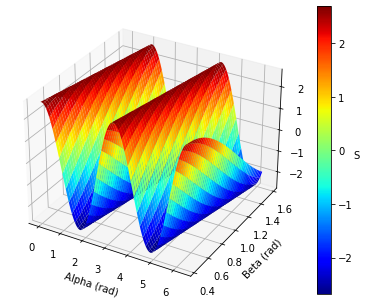

In [12]:
sweepS(5*math.pi/36,math.pi/2,40000,math.pi/4,26*math.pi/180)